Social Network Analysis with networkx
======

Graphviz is great for drawing graphs, but as your graphs get bigger you will want to get extra information out of them through analysis. So today we will use [the networkx library](https://networkx.readthedocs.org/en/stable/overview.html) to visualize and analyze a larger data set.

The data is taken from the tutorial "Introduction to network analysis with Gephi" by Martin Grandjean, [available here](http://www.martingrandjean.ch/introduction-to-network-visualization-gephi/). If this is a topic that is relevant to your work, I recommend downloading Gephi and working through the tutorial, although I make no guarantees concerning how smoothly Gephi will work on your system.

Let's have a look at our data set, found in the files `Nodes1.csv` and `Edges1.csv`. The nodes file looks like this:

    Id;Label;Attribute1;City;Latitude;Longitude
    376088951;name1;1;Berlin;52.51;13.4
    
and the edges file looks like this.

    Source;Target;Type;Weight
    376088951;17647430;Directed;1
    
These are CSV files (using a semicolon as separator), and [we already know how to parse CSV files](https://docs.python.org/3/library/csv.html). So we are going to want to read the `Nodes1` file to make our nodes with their respective attributes, and then we'll read the `Edges1` file to connect the nodes in the graph.

First let's just make sure we can get the information we want out of the CSV. We will use the header row to get the data keys, and then put that together with each of the subsequent rows to make a dictionary object that corresponds to the row. We'll print out five of them, just to make sure we are on track.

In [1]:
import csv

limit = 5;  # We will stop after five data rows
with open('Projects/TT2016/graphs/Nodes1.csv.txt', newline='') as f:
    reader = csv.reader(f, delimiter=';')
    # First, read in the first row to get our labels. We can use next() for this.
    header = next(reader)
    # The reader now contains the second and subsequent rows. We loop through them...
    for row in reader:
        # Create a new dictionary object for each row
        nodedata = {}
        # Go through the items in the row and stick their values, with the correct 
        # key, into the hash
        for i in range(len(row)):
            nodedata[header[i]] = row[i]
        # Print out the result.
        print(nodedata)
        # Make sure we stop after 5
        limit -= 1
        if limit == 0:
            break

{'Longitude': '13.4', 'Latitude': '52.51', 'Id': '376088951', 'Label': 'name1', 'Attribute1': '1', 'City': 'Berlin'}
{'Longitude': '13.4', 'Latitude': '52.51', 'Id': '17647430', 'Label': 'name2', 'Attribute1': '2', 'City': 'Berlin'}
{'Longitude': '13.4', 'Latitude': '52.51', 'Id': '32416061', 'Label': 'name3', 'Attribute1': '1', 'City': 'Berlin'}
{'Longitude': '13.4', 'Latitude': '52.51', 'Id': '550180187', 'Label': 'name4', 'Attribute1': '2', 'City': 'Berlin'}
{'Longitude': '13.4', 'Latitude': '52.51', 'Id': '28110685', 'Label': 'name5', 'Attribute1': '1', 'City': 'Berlin'}


OK! Now we have to take each of these rows and make a node out of it. So instead of printing out each key/value pair, we will make a node using the Id key, and make the rest of the keys into attributes on that node.

Here is where we start using the networkx library, so we have to import it. We create a new graph by calling the `Graph()` or `Digraph()` method of networkx. 

Note the statement `import networkx as nx`: that is just an alias for the library, and so a convenient shorthand to let us type `nx` whenever we mean `networkx`.

In [2]:
import networkx as nx

G = nx.DiGraph()

Now compare this bit of code with the one above. All I have changed is the following:

* Removed the limits
* Saved the node ID into its own variable, rather than into a dictionary key
* Changed the `print` statement to a method call adding the node to the graph

In [3]:
with open('Projects/TT2016/graphs/Nodes1.csv.txt', newline='') as f:
    reader = csv.reader(f, delimiter=';')
    # First, read in the first row to get our labels.
    header = next(reader)
    for row in reader:
        # Make a dictionary that will hold our node keys.
        nodeid = None
        nodedata = {}
        for i in range(len(row)):
            if header[i] == 'Id':
                nodeid = row[i]
            else:
                nodedata[header[i]] = row[i]
        # Now create the graph node using the 'Id' field as the main label.
        G.add_node(nodeid, attr_dict=nodedata)
        
G.number_of_nodes()

1000

That looks right - we should indeed have 1000 nodes.

**IF YOU HAVE A MULTIPLE OF 1000 NODES:** This almost certainly means that you ran the above cell more than once. If so, you will have to go back up to cell 2 and reinitialize your graph, then run your node-adding code one more time. 

Now let's look at one of the nodes. 

In [4]:
G.node['18673689']

{'Attribute1': '2',
 'City': 'Berlin',
 'Label': 'name48',
 'Latitude': '52.51',
 'Longitude': '13.4'}

Great! Now we have to add the edges. Looking back at our CSV file, it has four fields: Source, Target, Type, and Weight. It looks like the Type is always Directed, and we are working with a directed graph, so we can ignore that. 

You add an edge by specifying its source (the "from" node), target (the "to" node), and any attributes it should carry. Let's save the weight as an edge attribute; since in this case all our 'Type' fields say 'Directed', and we have already made this a directed graph, we can skip that field.

Our code this time will be much like the above, but rather simpler - instead of matching up header keys and row values, we will just make the assumption that the source is the first thing in the row, the target second, and the weight fourth.

In [5]:
with open('Projects/TT2016/graphs/Edges1.csv.txt', newline='') as f:
    reader = csv.reader(f, delimiter=';')
    # First, read in the first row to get our labels.
    header = next(reader)
    for row in reader:
        # Let's not do anything fancy; we know that the source is first, 
        # the target second, and the weight fourth.       
        # Create the edge between the source and the target, adding the 
        # weight as an attribute.
        G.add_edge(row[0], row[1], weight=row[3])
        
G.number_of_edges()

14116

Looking good! 

**IF YOU HAVE 15116 NODES OR MORE:** You probably forgot to use the Edges file instead of the Nodes file, when you first ran this loop. If so you will have to go back to cell 2, re-initialize your graph, and re-add your nodes and your edges.

NetworkX can also draw graphs for you, using a library called *matplotlib*. It expects you to make this library available for it under the name `plt`, so we will do that using the `import X as Y` trick again. We will also use the *pylab* library to make these graphs appear neatly inside the notebook.

We will see though that this graph is going to be too huge to get much out of other than a pretty picture!

In [6]:
import matplotlib.pyplot as plt
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Now we can draw a simple version of the graph.

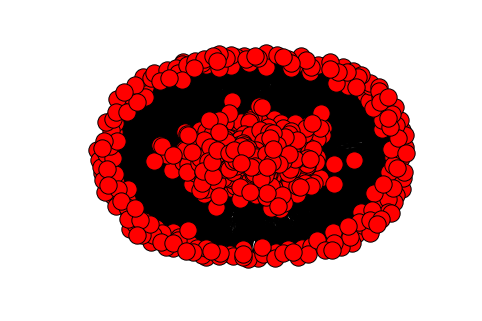

In [7]:
nx.draw(G)

What is really more interesting here is to run some analysis on the graph, to get it to tell us things! People who work with social networks have a few different measures that they use for this, which correspond roughly to the following interesting questions:

- Degree centrality: how many people do I personally know, compared to others in the network?
- Closeness centrality: how many degrees of separation am I, on average, from other people in the network?
- Betweenness centrality: how often am I the person that two others have in common?
- Eigenvector centrality: how many well-connected people am I connected to?

So let's get an answer for each of these. There is a method in networkx for each of these measures; each one calculates the answers for the entire graph and returns a dictionary whose keys are the nodes and whose values are the centrality measures for those nodes.

In [8]:
# Calculate the values for the whole graph
dc = nx.degree_centrality(G)
# Get the answer for one of the nodes
dc['18673689']

0.01001001001001001

Once that is done, we can find out which nodes are most popular by sorting the list.

Here we see a bonus Python technique: you can sort a list not just by the contents of the list itself, but really by any measure you like! The trick is to give the `sorted` function the name of a function that you have defined, which returns something by which the item should be sorted in the list. Here is how it works.

In [9]:
# Define our sorting key, which is the centrality measure
def getDegree(nodeid):
    return dc[nodeid]

# Sort the list of nodes by centrality. We reverse it so that the
# most central nodes come first.
popular = sorted(G.nodes(), key=getDegree, reverse=True)

# Print out the first and last nodes
print("Node %s is the most popular, with a centrality of %f" % (popular[0], dc[popular[0]]))
print("Node %s is the least popular, with a centrality of %f" % (popular[-1], dc[popular[-1]]))

# So who are our ten most popular nodes?
for i in range(10):
    print(G.node[popular[i]])

Node 257396357 is the most popular, with a centrality of 0.209209
Node 256948566 is the least popular, with a centrality of 0.003003
{'Attribute1': '1', 'Longitude': '9.98', 'Latitude': '53.54', 'City': 'Hamburg', 'Label': 'name79'}
{'Attribute1': '1', 'Longitude': '-0.11', 'Latitude': '51.5', 'City': 'London', 'Label': 'name215'}
{'Attribute1': '1', 'Longitude': '4.83', 'Latitude': '45.75', 'City': 'Lyon', 'Label': 'name638'}
{'Attribute1': '2', 'Longitude': '16.38', 'Latitude': '48.2', 'City': 'Wien', 'Label': 'name540'}
{'Attribute1': '2', 'Longitude': '8.52', 'Latitude': '47.38', 'City': 'Zurich', 'Label': 'name124'}
{'Attribute1': '1', 'Longitude': '14.42', 'Latitude': '50.07', 'City': 'Prag', 'Label': 'name343'}
{'Attribute1': '2', 'Longitude': '11.57', 'Latitude': '48.14', 'City': 'Munchen', 'Label': 'name106'}
{'Attribute1': '1', 'Longitude': '13.4', 'Latitude': '52.51', 'City': 'Berlin', 'Label': 'name13'}
{'Attribute1': '1', 'Longitude': '2.34', 'Latitude': '48.85', 'City': '

The methods `betweenness_centrality`, `closeness_centrality`, and `eigenvector_centrality` work precisely the same way. Try them out and see who is most significant to the network, by each of these measures.